In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('merged.csv') 

In [3]:
data.shape

(4099, 11)

In [4]:
data['description'].describe()

count                                                  4099
unique                                                 3747
top       Innovate. Collaborate. Shine. Lighthouse — KPM...
freq                                                     10
Name: description, dtype: object

In [5]:
data.isnull().any()

ID             False
position       False
company        False
reviews         True
location       False
zip_code        True
description    False
name           False
size           False
industry       False
country        False
dtype: bool

In [6]:
data.head()

,ID,position,company,reviews,location,zip_code,description,name,size,industry,country
0,5317,Field Application Scientist - Boston,10x Genomics,NaN,Boston,NaN,Region: Boston\n\nThe Field Applications Scien...,10x genomics,201-500,biotechnology,united states
1,3124,Validation Scientist,23andMe,4.0,Mountain View,94041.0,23andMe is seeking a talented Validation Scien...,23andme,501-1000,biotechnology,united states
2,1559,Scientist / Senior Scientist - Computational B...,23andMe,4.0,Mountain View,94041.0,With the world’s largest database of more than...,23andme,501-1000,biotechnology,united states
3,3076,Population Geneticist - Ancestry Research,23andMe,4.0,Mountain View,94041.0,We are seeking colleagues with extensive train...,23andme,501-1000,biotechnology,united states
4,2764,"Senior Product Manager, Research Tools",23andMe,4.0,Mountain View,94041.0,Who we are\n\n23andMe’s mission is to help ind...,23andme,501-1000,biotechnology,united states


In [7]:
# Group listings for data analysts 

data_analyst = data[data['position'].str.contains("Data Analyst|Data analyst|data analyst|Analyst|analyst]")] 

data_analyst.head()

,ID,position,company,reviews,location,zip_code,description,name,size,industry,country
5,2448,"Senior Financial Analyst, Research & Development",23andMe,4.0,Mountain View,94041.0,Reporting to the Director of Financial Plannin...,23andme,501-1000,biotechnology,united states
23,4122,Data Analyst / Engineer,7Park Data,NaN,New York,NaN,Data Analyst / Engineer\n\nThe Data Analyst / ...,7park data,51-200,information services,united states
26,2570,Quantitative Marketing Analyst,A Place for Mom,105.0,Seattle,NaN,OVERVIEW\nAPFM is looking for a passionate mar...,a place for mom,1001-5000,hospital & health care,united states
29,2551,"Web Analyst & Technical Editor, AARP Research",AARP,889.0,Washington,20001.0,Business Unit Description\n\n\nAARP is a nonpr...,aarp,5001-10000,non-profit organization management,united states
46,4957,Data Reporting Analyst,ACLU,70.0,New York,NaN,The ACLU is seeking a full-time Data Reporting...,aclu,1001-5000,non-profit organization management,united states


In [8]:
data_analyst.shape

(511, 11)

In [9]:
# Group listings for data scientists

data_scientist = data[data['position'].str.contains("Data Scientist|Data scientist|data scientist|Scientist|scientist")] 

data_scientist.head()

,ID,position,company,reviews,location,zip_code,description,name,size,industry,country
0,5317,Field Application Scientist - Boston,10x Genomics,NaN,Boston,NaN,Region: Boston\n\nThe Field Applications Scien...,10x genomics,201-500,biotechnology,united states
1,3124,Validation Scientist,23andMe,4.0,Mountain View,94041.0,23andMe is seeking a talented Validation Scien...,23andme,501-1000,biotechnology,united states
2,1559,Scientist / Senior Scientist - Computational B...,23andMe,4.0,Mountain View,94041.0,With the world’s largest database of more than...,23andme,501-1000,biotechnology,united states
6,2038,Data Scientist,23andMe,4.0,Mountain View,94041.0,23andMe is seeking an experienced data scienti...,23andme,501-1000,biotechnology,united states
7,6898,"Scientist, Bioanalytical Assay Development",23andMe,4.0,South San Francisco,NaN,"Who we are\n\nSince 2006, 23andMe’s mission ha...",23andme,501-1000,biotechnology,united states


In [10]:
data_scientist.shape

(1524, 11)

In [11]:
# Group listings for engineers

engineer = data[data['position'].str.contains("Engineer|engineer|Programmer|programmer|Developer|developer")] 

engineer.head()

,ID,position,company,reviews,location,zip_code,description,name,size,industry,country
12,233,Software Engineer - Genetics Platform,23andMe,4.0,Mountain View,94041.0,Join 23andMe in our mission is to be the world...,23andme,501-1000,biotechnology,united states
17,3887,Senior Software Engineer - Machine Learning as...,23andMe,4.0,Mountain View,94041.0,Join 23andMe and solve engineering problems to...,23andme,501-1000,biotechnology,united states
23,4122,Data Analyst / Engineer,7Park Data,NaN,New York,NaN,Data Analyst / Engineer\n\nThe Data Analyst / ...,7park data,51-200,information services,united states
31,650,Data Engineer,AbbVie,596.0,Chicago,NaN,"For large enterprise datasets, the data engine...",abbvie,10001+,pharmaceuticals,united states
39,5531,Data Scientist II – Bioinformatics Developer,AbbVie,596.0,Cambridge,NaN,The Scientific Informatics group at the AbbVie...,abbvie,10001+,pharmaceuticals,united states


In [12]:
engineer.shape

(929, 11)

In [13]:
# Create an array with the descriptions for each position

analyst_text = data_analyst.description.values
scientist_text = data_scientist.description.values
engineer_text = engineer.description.values


In [14]:
# Skills requirements

# Define a regex search function for Data Analyst

def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [15]:
# Create a data frame with skills name and regex pattern to search with

# Technical skills

tech_skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','Algorithm','Java','Visualization', 'PHP', 'Excel']

tech_skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
              "(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?', '(?i)\WPHP\W?', '(?i)\WExcel\W?']

tech_skill_df =pd.DataFrame(
    {"skill": tech_skills,
     "regex_pattern":tech_skill_patt})

In [16]:
# Iterate through the list of skills using the search function created

i = []
for x in tech_skill_df['regex_pattern']:
    i.append(count_text(x,analyst_text))
tech_skill_df['count'] = i
tech_skill_df['ptg'] = round(tech_skill_df['count']/len(analyst_text),2)
tech_skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,183,0.36
1,Python,(?i)\WPython\W,158,0.31
2,Hadoop,(?i)\WHadoop\W?,21,0.04
3,SQL,(?i)SQL\w*,196,0.38
4,Tableau,(?i)\WTableau\W?,82,0.16
5,TensorFlow,(?i)\WTensorFlow\W?,1,0.00
6,Agile,(?i)\WAgile\W?,21,0.04
7,Power BI,(?i)\WPower\s?BI\W?,14,0.03
8,Algorithm,(?i)\WAlgorithms?\W?,44,0.09
9,Java,(?i)Java\w*,43,0.08


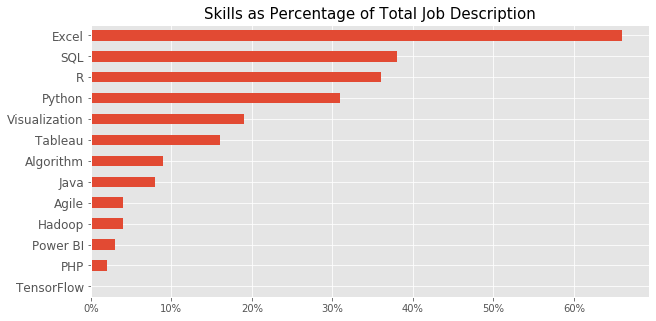

In [17]:
# Plot the skills as a percentage from all listings for Data Analysts 

x = tech_skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

In [18]:
# Soft skills

soft_skills = ['Communication','Teamwork','Research', 'Work ethic', 'Problem solving', 'Independent', 'Presentation', 'Confidence', 'Leadership skills', 'Interpersonal skills', 'Time Management', 'Critical Thinking', 'Adaptability']

soft_skill_patt = ['(?i)\WCommunication\W','(?i)\WTeamwork\W','(?i)\WResearch\W', '(?i)\WWork ethic\W', '(?i)\WProblem solving\W', '(?i)\WIndependent\W', '(?i)\WPresentation\W', '(?i)\WConfidence\W', '(?i)\WLeadership skills\W', '(?i)\WInterpersonal skills\W', '(?i)\WTime Management\W', '(?i)\WCritical Thinking\W', '(?i)\WAdaptability\W']

soft_skill_df = pd.DataFrame(
    {"skill": soft_skills,
     "regex_pattern": soft_skill_patt})

In [19]:
# Iterate through the list of skills using the search function created

j = []
for x in soft_skill_df['regex_pattern']:
    j.append(count_text(x,analyst_text))
soft_skill_df['count'] = j
soft_skill_df['ptg'] = round(soft_skill_df['count']/len(analyst_text),2)
soft_skill_df

,skill,regex_pattern,count,ptg
0,Communication,(?i)\WCommunication\W,278,0.54
1,Teamwork,(?i)\WTeamwork\W,29,0.06
2,Research,(?i)\WResearch\W,325,0.64
3,Work ethic,(?i)\WWork ethic\W,16,0.03
4,Problem solving,(?i)\WProblem solving\W,72,0.14
5,Independent,(?i)\WIndependent\W,58,0.11
6,Presentation,(?i)\WPresentation\W,81,0.16
7,Confidence,(?i)\WConfidence\W,13,0.03
8,Leadership skills,(?i)\WLeadership skills\W,2,0.00
9,Interpersonal skills,(?i)\WInterpersonal skills\W,47,0.09


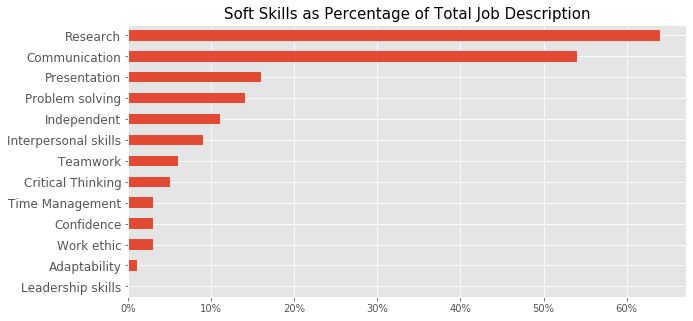

In [20]:
# Plot 

x = soft_skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Soft Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()